**Install Required Libraries**

In [ ]:
# Install OCR and helper libraries
!pip install easyocr
!pip install opencv-python
!pip install matplotlib
!pip install pdf2image
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
from google.colab import drive

print("Attempting to mount Google Drive...")
drive.mount('/content/drive')
print("✅ Google Drive mounted successfully.")

# Define your file path (update filename as needed)
# Example: IMAGE_PATH = '/content/drive/MyDrive/invoice.jpg'
# Or for PDF: IMAGE_PATH = '/content/drive/MyDrive/trade_document.pdf'
IMAGE_PATH = '/content/drive/MyDrive/invoice.jpg'

print("📄 Using file:", IMAGE_PATH)


Attempting to mount Google Drive...
Mounted at /content/drive
✅ Google Drive mounted successfully.
📄 Using file: /content/drive/MyDrive/invoice.jpg


In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import numpy as np
import pandas as pd
import os


In [ ]:
# Convert PDF to image if the file is a PDF
if IMAGE_PATH.lower().endswith('.pdf'):
    pages = convert_from_path(IMAGE_PATH, dpi=300)
    image_path = '/content/page_1.png'
    pages[0].save(image_path, 'PNG')
    print("✅ Converted PDF to image:", image_path)
else:
    image_path = IMAGE_PATH
    print("✅ Using image file directly:", image_path)


✅ Using image file directly: /content/drive/MyDrive/invoice.jpg


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


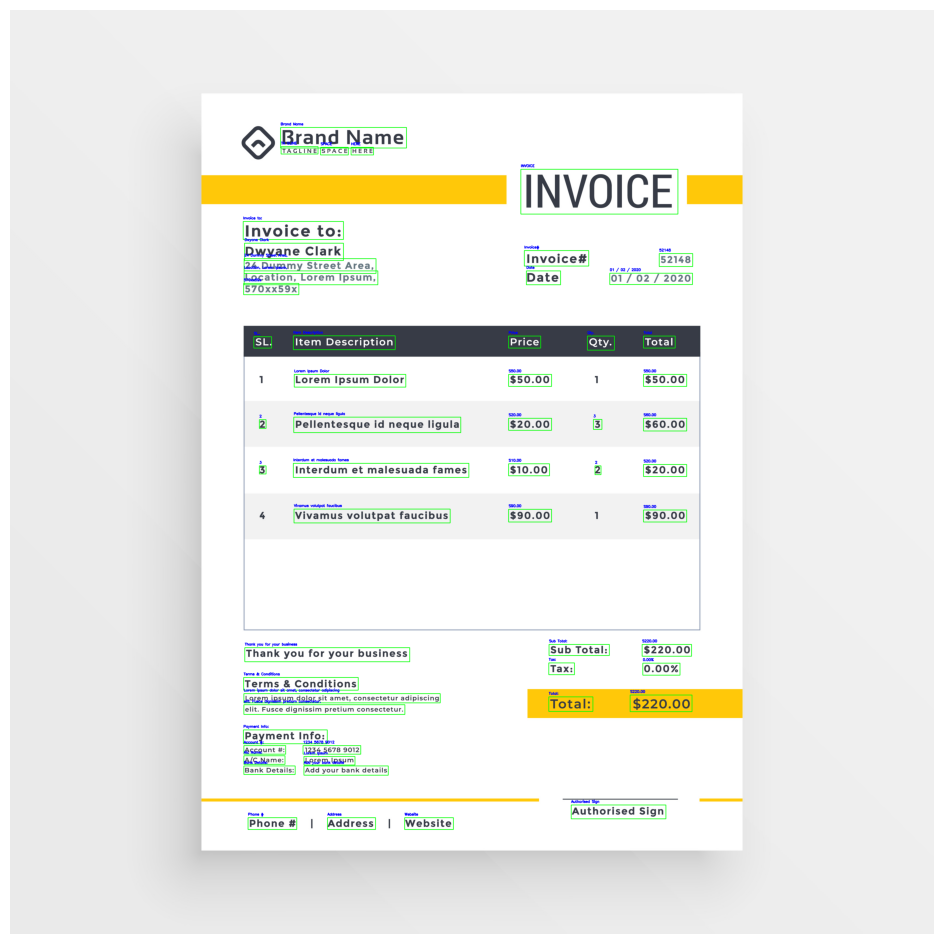

In [ ]:
# Initialize EasyOCR Reader (English only, add 'my' for Myanmar)
reader = easyocr.Reader(['en'])

# Perform OCR
results = reader.readtext(image_path)

# Display detected text boxes on image
image = cv2.imread(image_path)
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Convert OCR output to a DataFrame
data = []
for (bbox, text, prob) in results:
    data.append({
        "Detected Text": text,
        "Confidence": round(prob, 2),
        "Bounding Box": bbox
    })

df = pd.DataFrame(data)
print("🧾 Extracted text data:")
df


🧾 Extracted text data:


,Detected Text,Confidence,Bounding Box
0,Brand Name,0.76,"[[1171, 508], [1716, 508], [1716, 597], [1171,..."
1,TA GLINE,0.97,"[[1173, 591], [1333, 591], [1333, 623], [1173,..."
2,SPACE,0.92,"[[1344, 594], [1464, 594], [1464, 627], [1344,..."
3,HERE,0.79,"[[1476, 594], [1573, 594], [1573, 627], [1476,..."
4,INVOICE,1.00,"[[2211, 689], [2891, 689], [2891, 883], [2211,..."
5,Invoice to:,0.72,"[[1009, 915], [1443, 915], [1443, 993], [1009,..."
6,Dwyane Clark,0.94,"[[1015, 1009], [1443, 1009], [1443, 1084], [10..."
7,Invoice#,1.00,"[[2226, 1041], [2505, 1041], [2505, 1108], [22..."
8,52148,0.82,"[[2810, 1054], [2955, 1054], [2955, 1110], [28..."
9,"24 Dummy Street Area,",0.86,"[[1013, 1076], [1584, 1076], [1584, 1140], [10..."


In [ ]:
# Basic text cleaning
df['Detected Text'] = df['Detected Text'].str.strip()
df = df[df['Detected Text'] != ""]

# Example: Filter rows that include numbers (for invoice/trade items)
numeric_rows = df[df['Detected Text'].str.contains(r'\d', regex=True)]
print("📦 Numeric rows (e.g., amounts, invoice numbers):")
numeric_rows


📦 Numeric rows (e.g., amounts, invoice numbers):


,Detected Text,Confidence,Bounding Box
8,52148,0.82,"[[2810, 1054], [2955, 1054], [2955, 1110], [28..."
9,"24 Dummy Street Area,",0.86,"[[1013, 1076], [1584, 1076], [1584, 1140], [10..."
12,01 / 02 / 2020,0.73,"[[2596, 1139], [2954, 1139], [2954, 1188], [25..."
13,57Oxx59x,0.74,"[[1011, 1183], [1250, 1183], [1250, 1232], [10..."
20,S50.00,0.49,"[[2158, 1577], [2344, 1577], [2344, 1629], [21..."
21,S50.00,0.47,"[[2742, 1577], [2929, 1577], [2929, 1629], [27..."
22,2,0.99,"[[1079, 1773], [1108, 1773], [1108, 1811], [10..."
24,S20.00,0.92,"[[2158, 1767], [2344, 1767], [2344, 1819], [21..."
25,3,1.00,"[[2525, 1772], [2562, 1772], [2562, 1815], [25..."
26,S60.00,0.53,"[[2742, 1767], [2929, 1767], [2929, 1822], [27..."


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=numeric_rows)

https://docs.google.com/spreadsheets/d/1S7H4QUk-hAHHrih8aIqcjhjEDWZBR4PUDF7M4GkJKQ0/edit#gid=0


In [ ]:
output_path = '/content/drive/MyDrive/extracted_trade_document.csv'
df.to_csv(output_path, index=False)
print("✅ Extracted text saved to:", output_path)
